In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn
import csv

data = pd.read_csv("HR_comma_sep.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


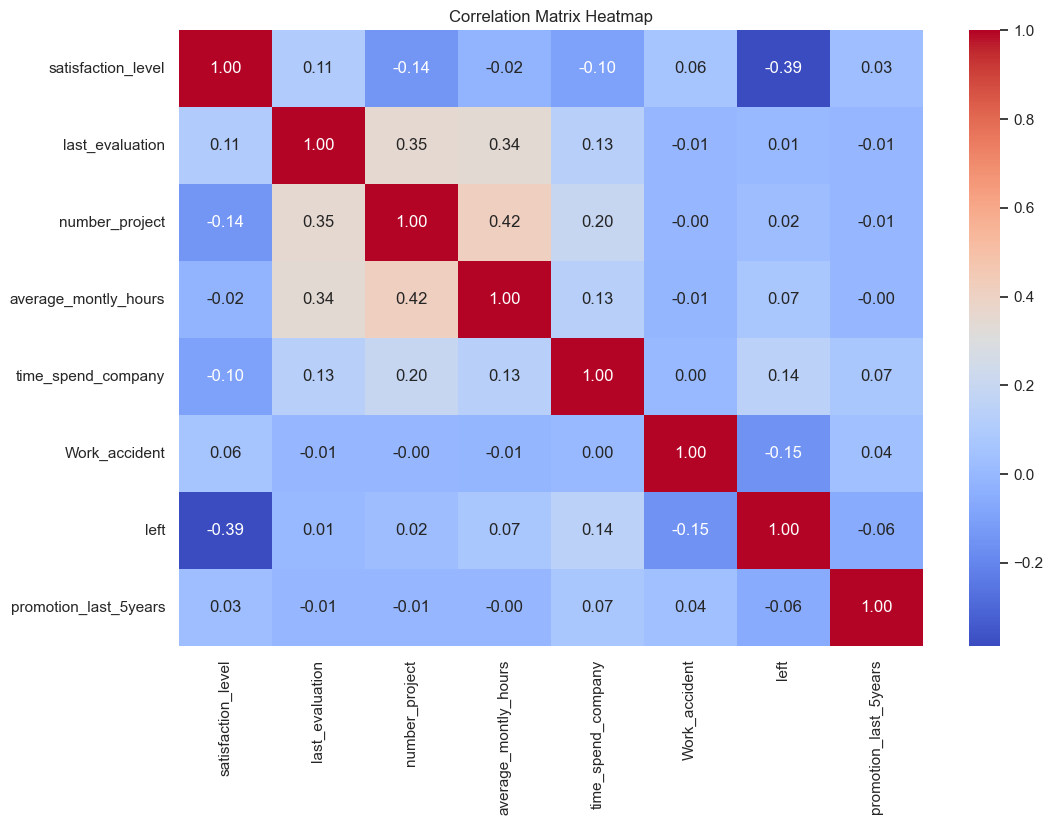

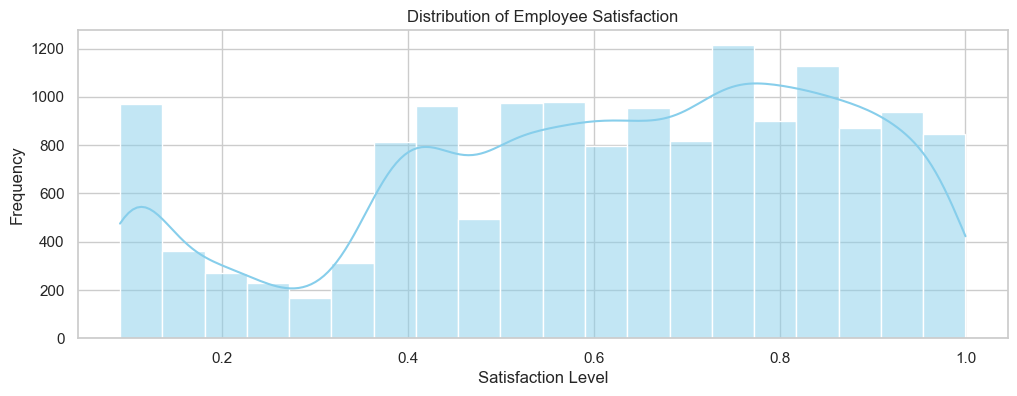

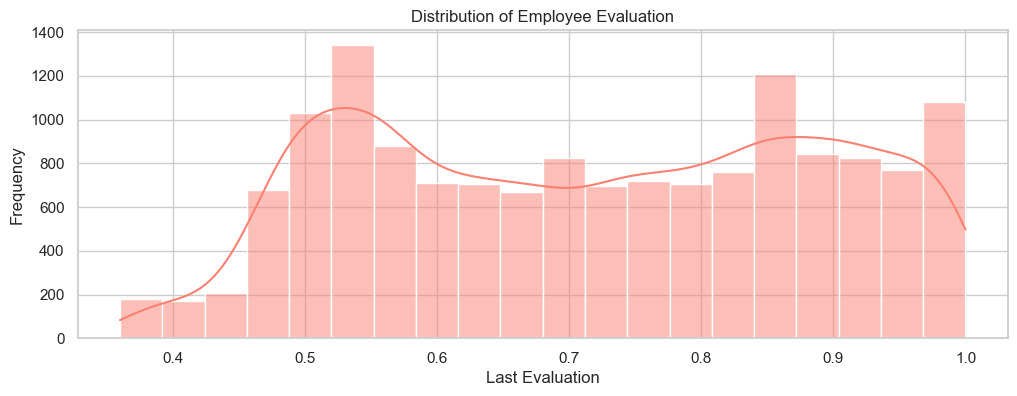

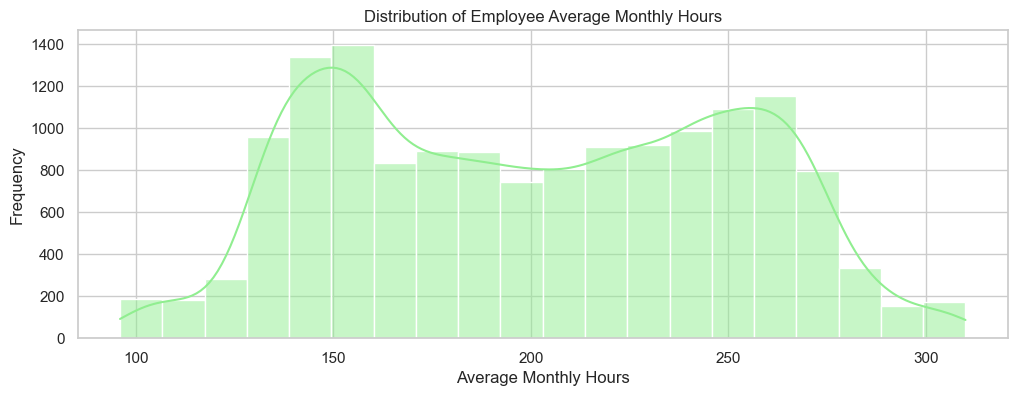

In [9]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Set the style of the visualizations
sns.set(style="whitegrid")

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot the distribution of Employee Satisfaction
plt.figure(figsize=(12, 4))
sns.histplot(data['satisfaction_level'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Employee Evaluation
plt.figure(figsize=(12, 4))
sns.histplot(data['last_evaluation'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Employee Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Employee Average Monthly Hours
plt.figure(figsize=(12, 4))
sns.histplot(data['average_montly_hours'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Employee Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()


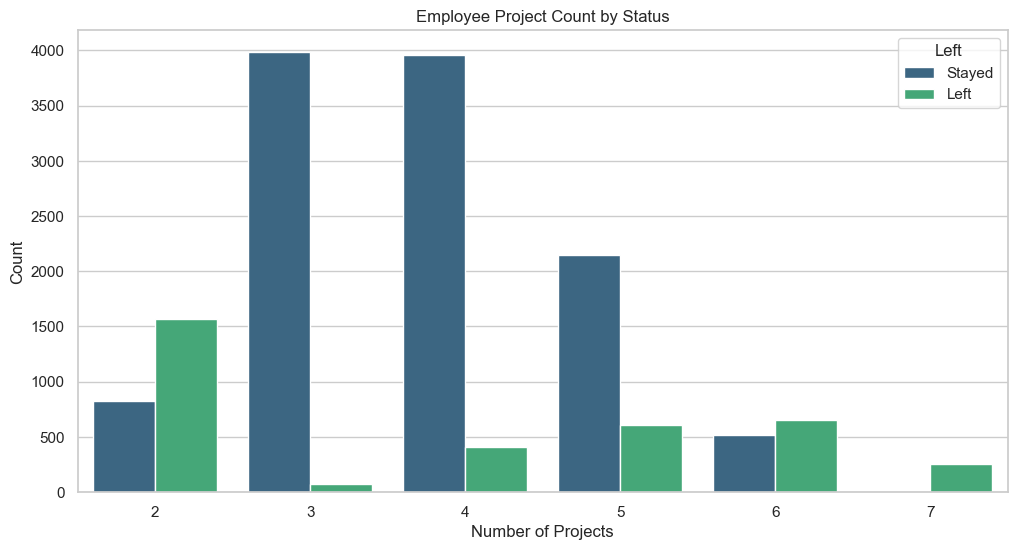

In [10]:
# Plot the bar plot of the employee project count
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='number_project', hue='left', palette='viridis')
plt.title('Employee Project Count by Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

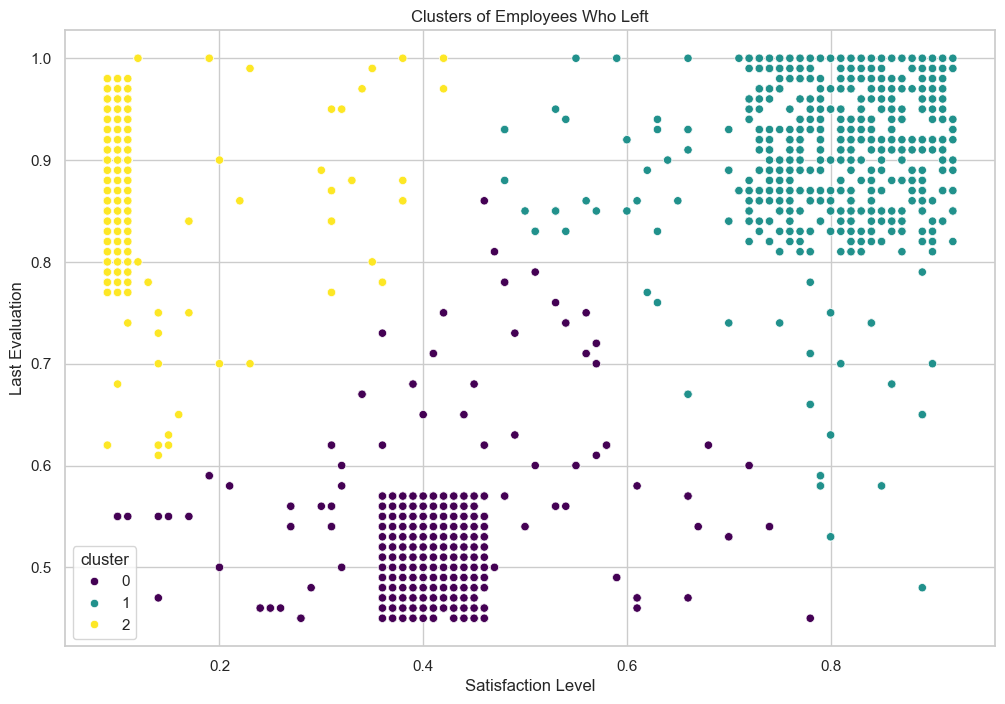

In [11]:
from sklearn.cluster import KMeans

# Choose columns satisfaction_level, last_evaluation, and left
left_employees = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(left_employees)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=left_employees, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='viridis')
plt.title('Clusters of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate categorical variables and numeric variables
categorical_vars = data[['sales', 'salary']]
numeric_vars = data.drop(columns=['sales', 'salary'])

# Apply get_dummies() to the categorical variables
categorical_vars_encoded = pd.get_dummies(categorical_vars, drop_first=True)

# Combine categorical variables and numeric variables
data_encoded = pd.concat([numeric_vars, categorical_vars_encoded], axis=1)

# Do the stratified split of the dataset to train and test in the ratio 80:20
X = data_encoded.drop(columns=['left'])
y = data_encoded['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Upsample the train dataset using the SMOTE technique
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000)
y_pred_lr = cross_val_predict(lr_model, X_train_resampled, y_train_resampled, cv=5)
print(classification_report(y_train_resampled, y_pred_lr))

# Train a Random Forest Classifier model
rf_model = RandomForestClassifier()
y_pred_rf = cross_val_predict(rf_model, X_train_resampled, y_train_resampled, cv=5)
print(classification_report(y_train_resampled, y_pred_rf))

# Train a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
y_pred_gb = cross_val_predict(gb_model, X_train_resampled, y_train_resampled, cv=5)
print(classification_report(y_train_resampled, y_pred_gb))


              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.79     18284
   macro avg       0.80      0.79      0.79     18284
weighted avg       0.80      0.79      0.79     18284

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9142
           1       1.00      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



ROC/AUC for Logistic Regression: 0.7947385692408663
ROC/AUC for Random Forest: 0.9827171297309122
ROC/AUC for Gradient Boosting: 0.9616057755414571


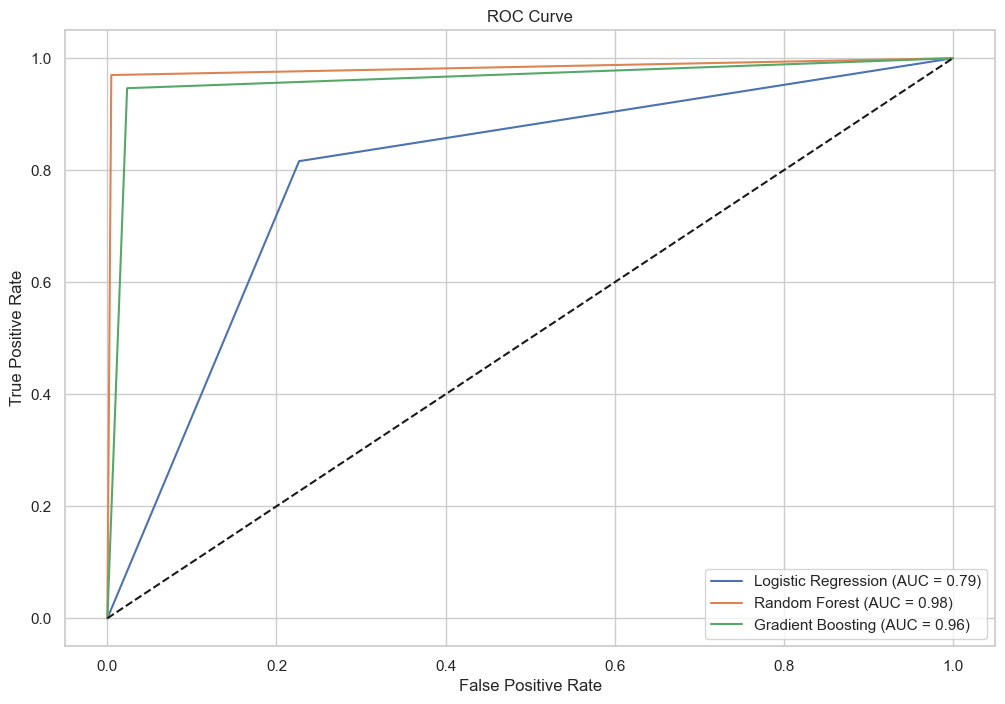

Confusion Matrix for Logistic Regression:
[[7069 2073]
 [1680 7462]]
Confusion Matrix for Random Forest:
[[9100   42]
 [ 274 8868]]
Confusion Matrix for Gradient Boosting:
[[8929  213]
 [ 489 8653]]


In [40]:
from sklearn.metrics import roc_auc_score

# Find the ROC/AUC for each model
roc_auc_lr = roc_auc_score(y_train_resampled, y_pred_lr)
roc_auc_rf = roc_auc_score(y_train_resampled, y_pred_rf)
roc_auc_gb = roc_auc_score(y_train_resampled, y_pred_gb)

print(f'ROC/AUC for Logistic Regression: {roc_auc_lr}')
print(f'ROC/AUC for Random Forest: {roc_auc_rf}')
print(f'ROC/AUC for Gradient Boosting: {roc_auc_gb}')

# Plot the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_train_resampled, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_train_resampled, y_pred_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_train_resampled, y_pred_gb)

plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Find the confusion matrix for each of the models
conf_matrix_lr = confusion_matrix(y_train_resampled, y_pred_lr)
conf_matrix_rf = confusion_matrix(y_train_resampled, y_pred_rf)
conf_matrix_gb = confusion_matrix(y_train_resampled, y_pred_gb)

print('Confusion Matrix for Logistic Regression:')
print(conf_matrix_lr)
print('Confusion Matrix for Random Forest:')
print(conf_matrix_rf)
print('Confusion Matrix for Gradient Boosting:')
print(conf_matrix_gb)


In [41]:
# Use the best model to predict the probability of employee turnover in the test data
best_model = gb_model.fit(X_train_resampled, y_train_resampled)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Categorize the employees into four zones based on their probability score
employee_zones = pd.DataFrame({
    'Probability': y_pred_prob,
    'Zone': pd.cut(y_pred_prob, bins=[0, 0.2, 0.6, 0.9, 1], labels=['Safe Zone', 'Low-Risk Zone', 'Medium-Risk Zone', 'High-Risk Zone'])
})

print(employee_zones)


      Probability            Zone
0        0.006424       Safe Zone
1        0.954462  High-Risk Zone
2        0.091569       Safe Zone
3        0.013829       Safe Zone
4        0.025258       Safe Zone
...           ...             ...
2995     0.011210       Safe Zone
2996     0.034530       Safe Zone
2997     0.044648       Safe Zone
2998     0.010429       Safe Zone
2999     0.932658  High-Risk Zone

[3000 rows x 2 columns]


Employee Satisfaction:
The distribution of employee satisfaction levels appears to be somewhat uniform, with a slight peak around the middle values. This suggests that most employees have moderate satisfaction levels, with fewer employees at the extremes of very low or very high satisfaction.

Employee Evaluation:
The distribution of employee evaluations shows a peak towards the higher end of the scale. This indicates that a significant number of employees received high ratings in their last evaluation.

Employee Average Monthly Hours:
The distribution of average monthly hours worked by employees shows a peak around the middle values, with a gradual decline towards the extremes. This suggests that most employees work a moderate number of hours, with fewer employees working very low or very high hours.

Employee Project Count by Status:
The bar plot of the employee project count shows that employees who worked on 2 to 4 projects are more likely to leave the company compared to those who worked on a different number of projects.
Employees involved in 3 projects show the highest count of those who have left, indicating a potential workload or project management issue at this level. Employees with 5 or more projects are less likely to leave, suggesting that higher project involvement might correlate with better retention.
Employees with fewer projects (e.g., 2 projects) also show a significant number of departures, which might indicate dissatisfaction or lack of engagement with fewer projects.